In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

import datetime
import pandas as pd
import numpy as np
import csv
import folium
from folium.plugins import HeatMap 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.cluster import KMeans    ##  K-means 임포트
from sklearn.metrics import silhouette_score
import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage
import statsmodels.formula.api as smf
from dateutil.relativedelta import relativedelta
# import setuptools.dist
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
import networkx as nx
plt.rc('font',family='D2CodingLigature Nerd Font')
# plt.rcParams['axes.unicode_minus']=False  # '- 표시

In [ ]:
# 전복에 대한 데이터

df = pd.read_csv('../../data/abalone.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [6]:
## 나이테 수에 따른 전복 개수
df.groupby('Rings').count()

,Gender,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Rings,,,,,,,,
1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1
3,15,15,15,15,15,15,15,15
4,57,57,57,57,57,57,57,57
5,115,115,115,115,115,115,115,115
6,259,259,259,259,259,259,259,259
7,391,391,391,391,391,391,391,391
8,568,568,568,568,568,568,568,568
9,689,689,689,689,689,689,689,689


In [7]:
# 나이테 수에 따른 순살의 평균 무게 (Shucked weight)
df.groupby('Rings')[['Shucked weight']].mean()

,Shucked weight
Rings,
1,0.001000
2,0.004500
3,0.011767
4,0.024719
5,0.061696
6,0.123158
7,0.182657
8,0.293773
9,0.387938


In [ ]:
# 순살무게, 전체무게, 껍질의 무게
df.groupby('Rings')[['Shucked weight', 'Whole weight', 'Shell weight']].mean()

,Shucked weight,Whole weight,Shell weight
Rings,,,
1,0.001000,0.002000,0.001500
2,0.004500,0.015000,0.005000
3,0.011767,0.028400,0.008933
4,0.024719,0.059605,0.018000
5,0.061696,0.125500,0.036770
6,0.123158,0.273174,0.078388
7,0.182657,0.397386,0.111648
8,0.293773,0.640753,0.178609
9,0.387938,0.852013,0.236509


<Axes: xlabel='Gender', ylabel='count'>

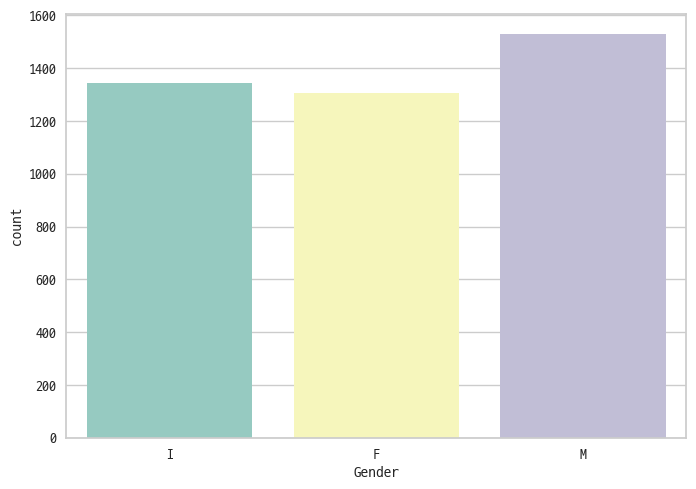

In [ ]:
## 성별 분포(x축은 범주형), order은 순서지정(없으면 데이터가 나오는 순서)
sns.countplot(x = 'Gender', data = df, palette="Set3", order=['I', 'F', 'M'])

array([[<Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>,
        <Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Whole weight'}>],
       [<Axes: title={'center': 'Shucked weight'}>,
        <Axes: title={'center': 'Viscera weight'}>,
        <Axes: title={'center': 'Shell weight'}>,
        <Axes: title={'center': 'Rings'}>]], dtype=object)

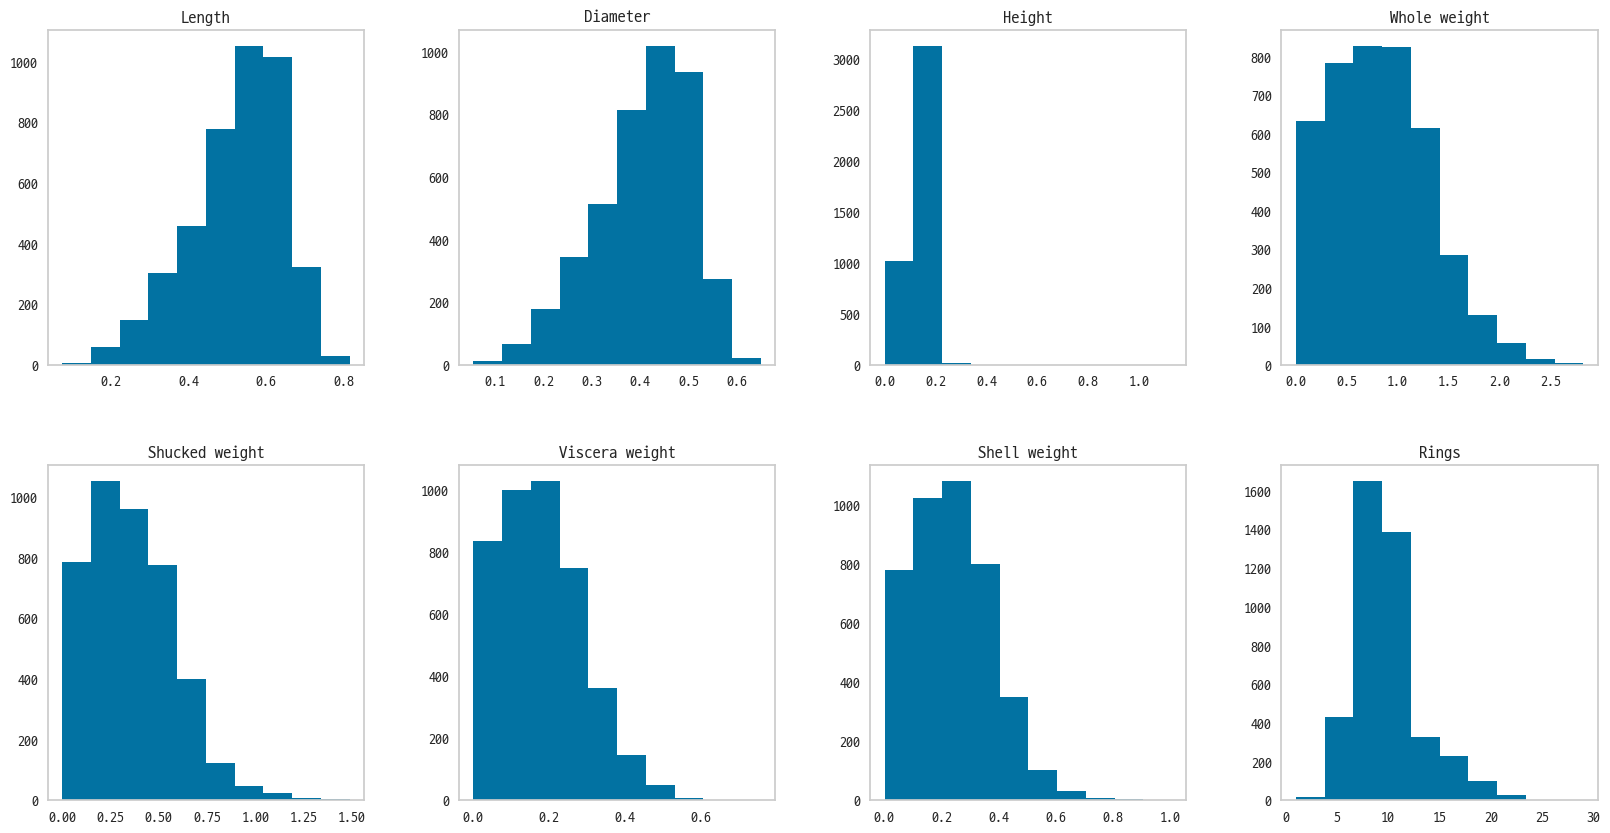

In [14]:
##  히스토그램으로 속성별 분포 확인
df.hist(figsize=(20,10), grid=False, layout=(2, 4))

<Axes: >

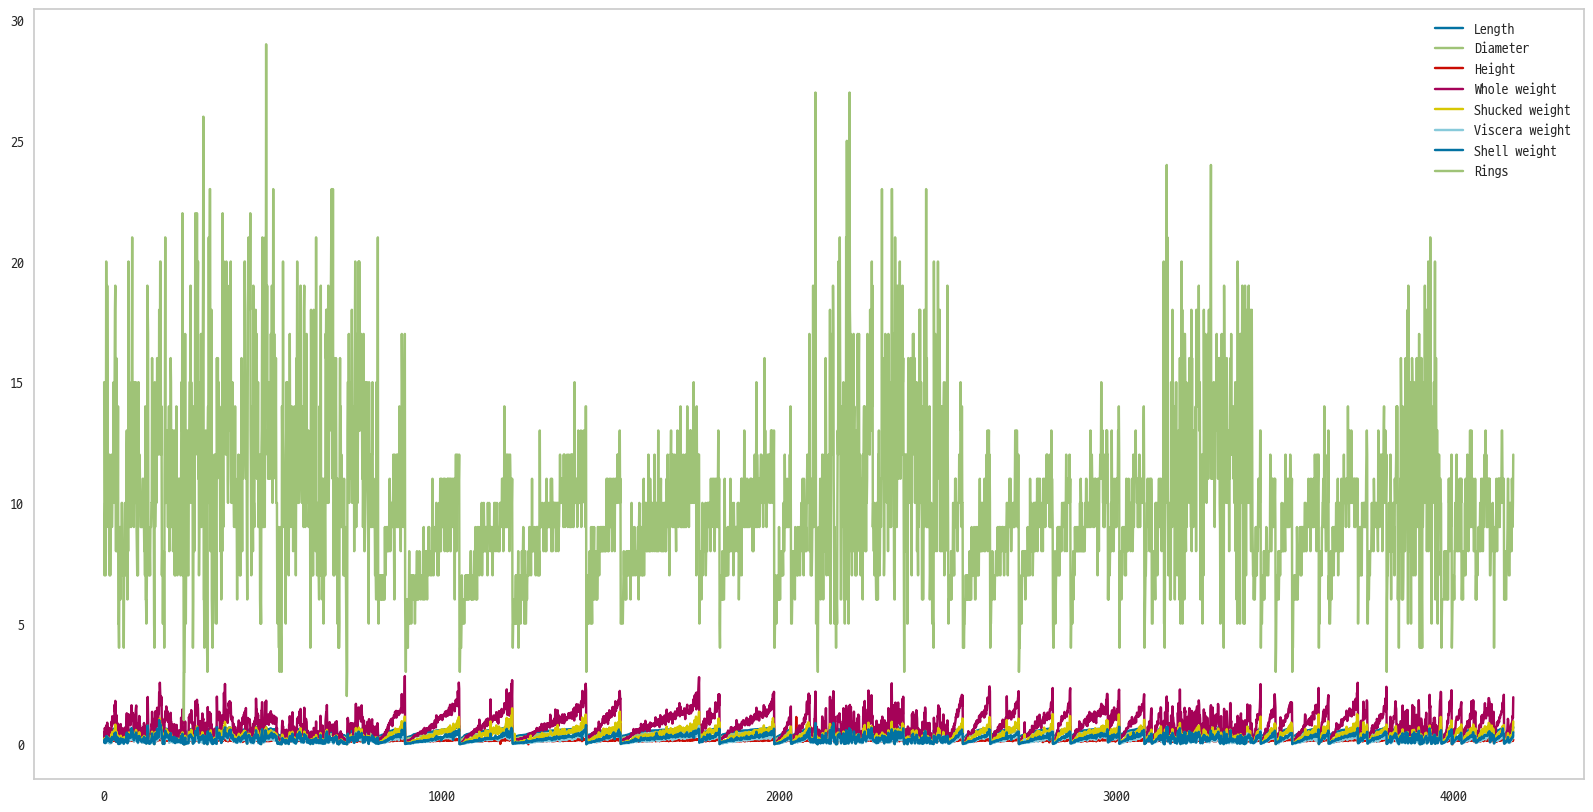

In [17]:
df.plot(figsize=(20,10), grid=False, layout=(2, 4))

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')


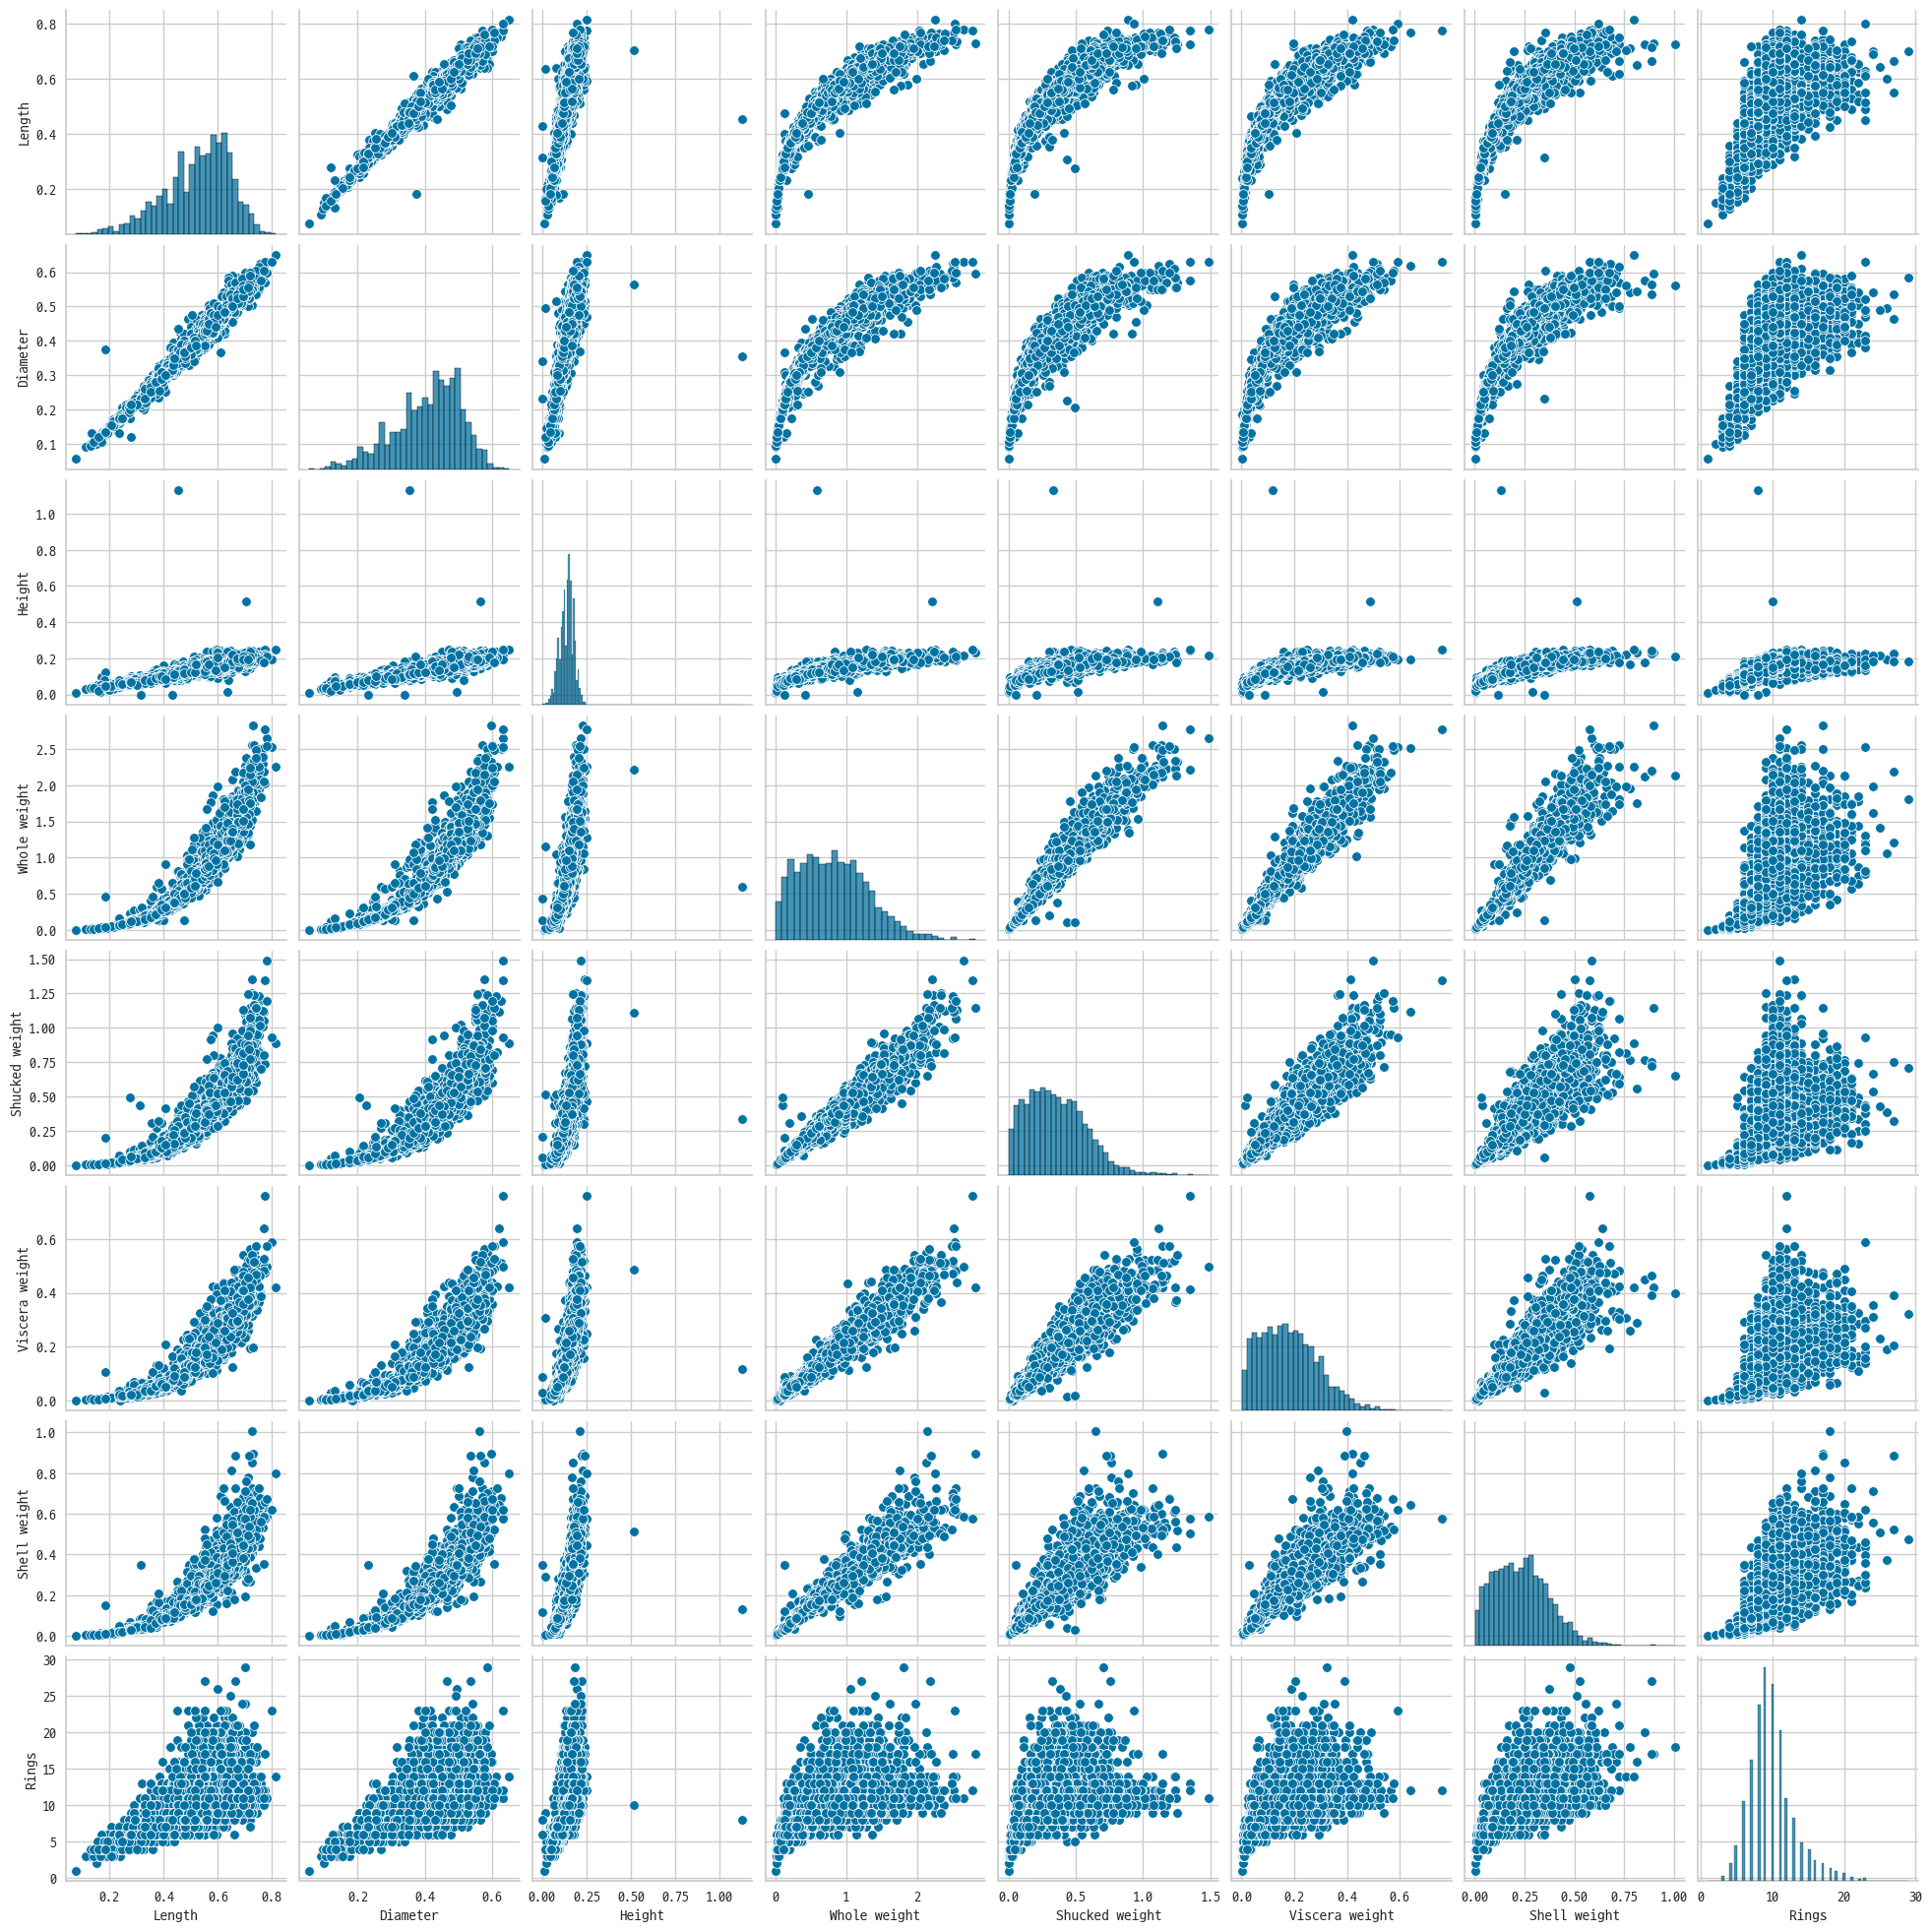

In [19]:
## 각 항목의 상관관계 (pairplot)

num_features = df.select_dtypes(include=[np.number]).columns
print(num_features)
sns.pairplot(df[num_features])

In [ ]:
# 상관계수
c = df[num_features].corr()
c

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


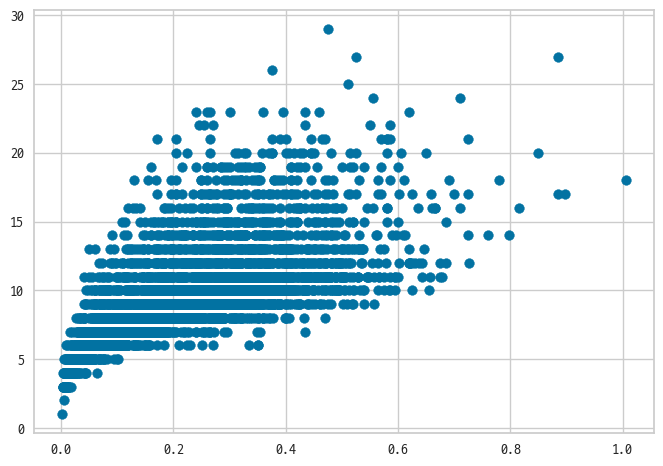

In [ ]:
## 껍질무게 이상치 확인

var = 'Shell weight'
plt.scatter(x = df[var], y = df['Rings'])
plt.grid(True)

In [23]:
# 이상치 제외(이상치 기준은 자율)
df.drop(df[(df['Shell weight']> 0.8) | (df['Rings'] > 25)].index, inplace=True)

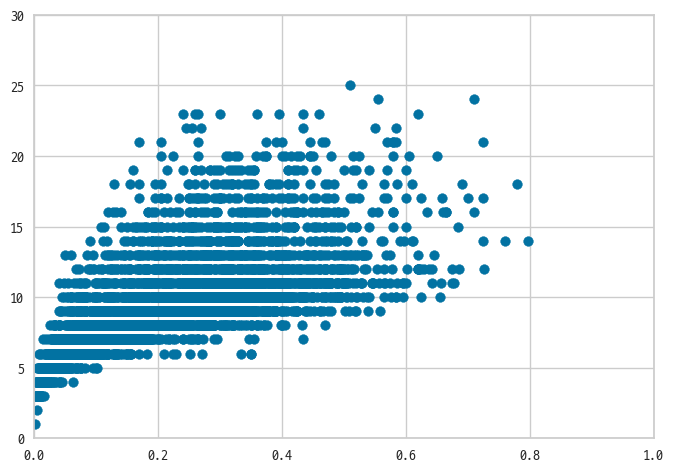

In [ ]:
## 껍질무게 이상치 제거

var = 'Shell weight'
plt.scatter(x = df[var], y = df['Rings'])
plt.ylim(0,30)      # y축값을 일치시켜 비교가 편리
plt.xlim(0,1.0)     # x축값을 일치시켜 비교가 편리
plt.grid(True)

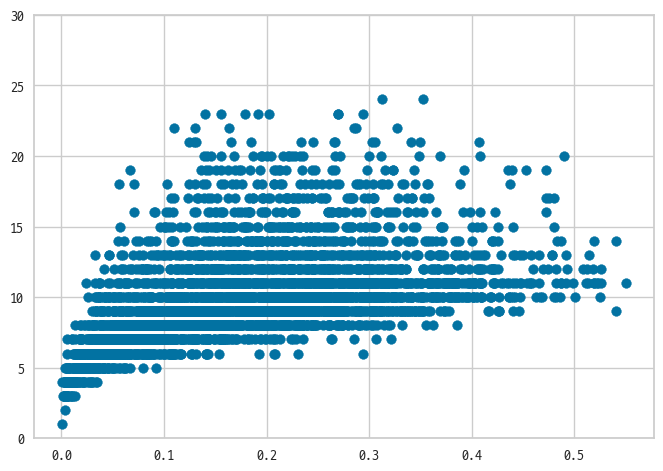

In [28]:
# 내장무게 이상치   'Viscera weight'

var = 'Viscera weight'
plt.scatter(x = df[var], y = df['Rings'])
plt.ylim(0,30)
plt.grid(True)

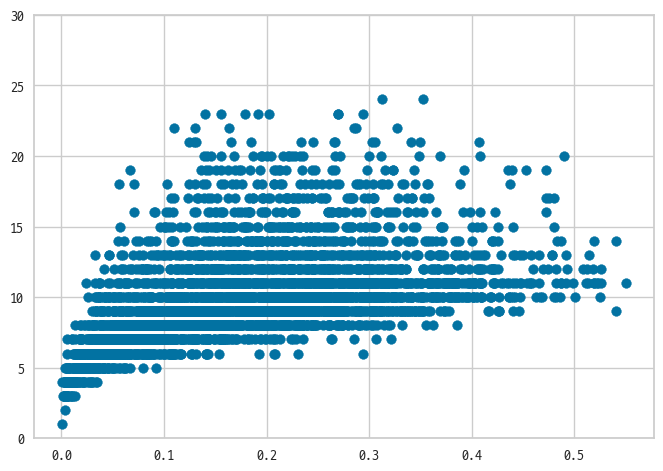

In [27]:
df.drop(df[(df['Viscera weight']> 0.55) | (df['Rings'] >= 25)].index, inplace=True)

var = 'Viscera weight'
plt.scatter(x = df[var], y = df['Rings'])
plt.ylim(0,30)
plt.grid(True)